In [1]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt
import statistics

data = pd.read_csv('filtered_final_dataset.csv')
data

,Unnamed: 0,Unnamed: 0.1,Name,Rank,Race,Year,CaseID,TypeOfMisconduct,Allegation,Finding,...,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN / EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,0,0,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
1,1,1,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Neg.Duty/Unreasonable Judge,Exonerated,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
2,2,2,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
3,3,3,joseph abasciano,Police Officer,White,2011.0,IAD2011-0182,Citizen complaint,Force,Not Sustained,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
4,4,4,joseph abasciano,Police Officer,White,2013.0,IAD2013-0019,Citizen complaint,Neg.Duty/Unreasonable Judge,Not Sustained,...,Police Officer,"$96,890.67",NaN,$850.00,"$16,595.52",NaN,NaN,"$24,222.83","$138,559.02",2132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,8816,1,vladimir xavier,Police Officer,Black,2012.0,IAD2012-0009,Citizen complaint,FIO Reports,Sustained,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
3967,8817,2,vladimir xavier,Police Officer,Black,2014.0,IAD2014-0255,Citizen complaint,Respectful Treatment,Unfounded,...,Police Officer,"$93,424.55",NaN,$800.00,"$19,103.00","$3,633.94",NaN,NaN,"$116,961.49",2121.0
3968,8818,0,anthony d ierardi,Sergeant,White,2017.0,IAD2017-0154,Internal investigation,Details,Sustained,...,Police Sergeant/FgrPrt Ev Tech,NaN,NaN,"$12,069.32",NaN,"$118,924.58",NaN,"$23,784.81","$154,778.71",2030.0
3969,8819,0,robert m zingg,Detective,White,2011.0,IAD2011-0553,Internal investigation,Conduct Unbecoming,Sustained,...,Police Detective,"$117,457.28",NaN,"$5,026.27","$97,867.55",NaN,NaN,NaN,"$220,351.10",2090.0


# Initial Exploration -- See Look at Race, Rank, and Misconducts of Officers

Types of Misconduct

In [4]:
data['TypeOfMisconduct'].value_counts()

Citizen complaint         3059
Internal investigation     912
Name: TypeOfMisconduct, dtype: int64

There are two types of misconduct - citizen complaint, and internal investigation. Now, we want to see 
whether or not race, ranking, and type  of misconduct have an effect on the amount of contributions 
an officer makes.

In [5]:
# Sum of the total amounts for each officer WITHOUT duplicate dates
sum = {}
total_sum = 0
for n in data['Name'].unique():
    dates = []
    sum[n] = 0
    for d in data.loc[data['Name'] == n, 'Date']:
        if d not in dates:
            dates.append(d)
            s = ((data.loc[(data['Date'] == d )& (data['Name'] == n), 'Amount'].values)[0])
            sum[n] += s
    total_sum += sum[n]
sum

{'joseph abasciano': 1549.06,
 'cesar abreu': 350.0,
 'luis m anjos': 800.0,
 'christopher adams': 500.0,
 'christopher p adams': 500.0,
 'john a adduci': 850.0,
 'jason m albanese': 825.0,
 'anthony m alexis': 100.0,
 'lamont anderson': 900.0,
 'alfredo andres': 275.0,
 'diamantino e araujo': 825.0,
 'mark l assad': 1250.0,
 'gerard w bailey': 1180.0,
 'dana s barrett': 6500.0,
 'harry bazile': 100.0,
 'manuel blas': 350.0,
 'michael john boulger': 2200.0,
 'john p boyle': 450.0,
 'john t boyle': 450.0,
 'john d broderick': 3500.0,
 'gwendolyn brown': 400.0,
 'michael a brown': 3500.0,
 'michael burke': 2000.0,
 'john g burrows': 750.0,
 'christopher bailey': 300.0,
 'brian l ball': 1300.0,
 'matthew f becker': 260.0,
 'cynthia m beckford-brewington': 100.0,
 'fabian j belgrave': 250.0,
 'anthony n bellissimo': 500.0,
 'paul j bercume': 100.0,
 'thomas p bernier': 250.0,
 'dean bickerton': 1950.0,
 'michael r bizzozero': 350.0,
 'brian c black': 200.0,
 'omar borges': 500.0,
 'eric d 

In [6]:
# Adding correct total contributions to dataset 
data = data.drop_duplicates(subset = ["Name"])
data['Total Amount']= data['Name'].map(sum)
df = data[['Name', 'Race','TypeOfMisconduct','Allegation', 'Date', 'Rank', 'Total Amount']]
df

C:\Users\13474\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Race,TypeOfMisconduct,Allegation,Date,Rank,Total Amount
0,joseph abasciano,White,Citizen complaint,Neg.Duty/Unreasonable Judge,9/11/2016,Police Officer,1549.06
56,cesar abreu,Hispanic,Citizen complaint,Neg.Duty/Unreasonable Judge,8/15/2016,Police Officer,350.00
80,luis m anjos,Black,Citizen complaint,Neg.Duty/Unreasonable Judge,7/25/2014,Police Officer,800.00
100,christopher adams,White,Citizen complaint,Neg.Duty/Unreasonable Judge,3/15/2018,Police Officer,500.00
102,christopher p adams,White,Citizen complaint,Neg.Duty/Unreasonable Judge,3/15/2018,Police Officer,500.00
...,...,...,...,...,...,...,...
3954,dante b williams,Hispanic,Citizen complaint,Neg.Duty/Unreasonable Judge,8/30/2017,Detective,300.00
3962,fred r williams,White,Internal investigation,Respectful Treatment,4/24/2013,Lieutenant,700.00
3965,vladimir xavier,Black,Citizen complaint,Respectful Treatment,8/28/2013,Police Officer,20.00
3968,anthony d ierardi,White,Internal investigation,Details,9/11/2013,Sergeant,500.00


Average Amount of Contribution For Officers who are White:  860.7099342105263
Average Amount of Contribution For Officers that are Hispanic:  429.8666666666666
Average Amount of Contribution For Officers that are Black:  599.5087719298245


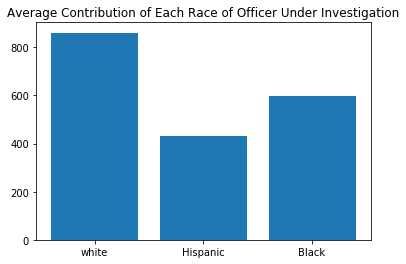

In [7]:
# Plot to see Demographic of Officers and the Average Contributions
race1 = []
for race in df.Race:
    for amount in df.loc[data['Race'] == race, 'Total Amount']:
        if race == 'White':
            race1.append(amount)

race2 = []
for race in df.Race:
    for amount in df.loc[data['Race'] == race, 'Total Amount']:
        if race == 'Hispanic':
            race2.append(amount)

race3 = []
for race in df.Race[0:20]:
    for amount in df.loc[data['Race'] == race, 'Total Amount']:
        if race == 'Black':
            race3.append(amount)

avg1 = np.mean(race1)
avg2 = np.mean(race2)
avg3 = np.mean(race3)

print("Average Amount of Contribution For Officers who are White: ", avg1)
print("Average Amount of Contribution For Officers that are Hispanic: ", avg2)
print("Average Amount of Contribution For Officers that are Black: ", avg3)

fig = plt.figure()
race = ['white', 'Hispanic', 'Black']
amount = [avg1, avg2, avg3]
plt.bar(race, amount)
plt.title("Average Contribution of Each Race of Officer Under Investigation")
plt.show()

From the three races represented on the graph, white officers made the most contributions. Now, we want to see if
the ranking and the type of misconduct are related to race, and contribution amount. It is interesting to point out that there are more Hispanic officers than Black ones, even though Black officers contributed more. 

Average Amount of Contribution For Officers who's Misconduct is Citizen Complaint:  772.1757357357359
Average Amount of Contribution For Officers who's Misconduct is Internal Investigation:  774.8191430186547


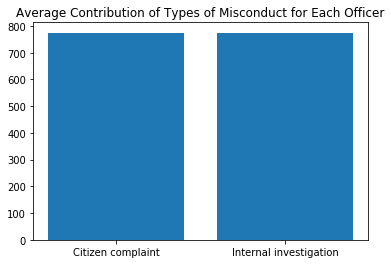

In [8]:
# Plot types of misconducts and the average contribution made by officer 

complaint = []
for m in df.TypeOfMisconduct:
    for amount in df.loc[data['TypeOfMisconduct'] == m, 'Total Amount']:
        if m == 'Citizen complaint':
            complaint.append(amount)
investigation = []
for i in df.TypeOfMisconduct:
    for amount in df.loc[data['TypeOfMisconduct'] == i, 'Total Amount']:
        if m == 'Internal investigation':
            investigation.append(amount)
            
avg1 = np.mean(complaint)
avg2 = np.mean(investigation)

print("Average Amount of Contribution For Officers who's Misconduct is Citizen Complaint: ", avg1)
print("Average Amount of Contribution For Officers who's Misconduct is Internal Investigation: ", avg2)

fig = plt.figure()
conduct = ['Citizen complaint', 'Internal investigation']
amount = [avg1, avg2]
plt.bar(conduct, amount)
plt.title("Average Contribution of Types of Misconduct for Each Officer")
plt.show()
# do we even need the plot?

We can see that amount that the average amount of contributions by officers who's type of misconduct is
internal investigation is higher than the ones who got citizen's complaints only by 2 dollars. We conclude that he type of misconduct had no affect on the amount the officer contributed. 

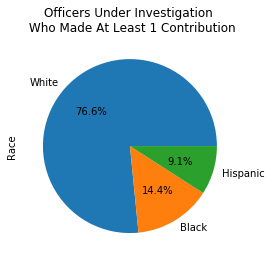

In [9]:
# Plot of Race of Officers Under Investigation

data['Race'].value_counts().plot(kind='pie',autopct='%1.1f%%',)
plt.title("Officers Under Investigation \n Who Made At Least 1 Contribution")
plt.show()

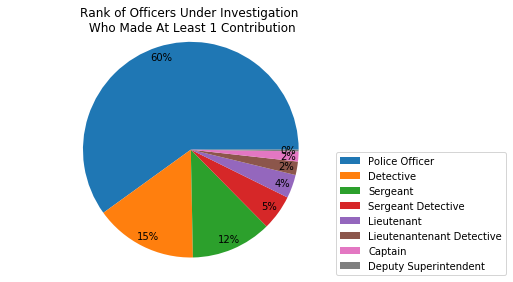

In [13]:
# Plot of Officer Rank 
vals_rank = data['Rank'].value_counts()
x = vals_rank.tolist()
labels = vals_rank.index.tolist()
plt.figure()

plt.gca().axis("equal")
pie = plt.pie(x, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title('Rank of Officers Under Investigation \n Who Made At Least 1 Contribution')
plt.legend(pie[0],labels, bbox_to_anchor=(0.75,0.5), loc="best", 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

plt.show()
plt.clf()
plt.close()